# Concrete Crack Detection - EDA

## Dataset Overview
- **Source**: Concrete Crack Images for Classification (CCIC) https://www.kaggle.com/datasets/arunrk7/surface-crack-detection
- **Total Images**: 40,000 (20,000 Positive/Crack + 20,000 Negative/No Crack)
- **Image Dimensions**: 227 × 227 pixels
- **Color Channels**: RGB (3 channels)

## 1. setup and imports

In [45]:
import os
import random
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

print("Imports successful!")

Imports successful!


## 2. dataset download instructions

Download dataset using one of the following methods:

### Option 1: Kaggle CLI
```bash
pip install kaggle
kaggle datasets download -d arunrk7/surface-crack-detection
unzip surface-crack-detection.zip -d data/
```

### Option 2: Manual Download
1. Visit: https://www.kaggle.com/datasets/arunrk7/surface-crack-detection
2. Click "Download" button
3. Extract the ZIP file to the `data/` directory

## 3. dataset configuration

In [46]:
DATA_DIR = Path('../data')
POSITIVE_DIR = DATA_DIR / 'Positive'
NEGATIVE_DIR = DATA_DIR / 'Negative'

if not DATA_DIR.exists():
    print("Warning: data/ directory not found!")
    print("Please download the dataset following the instructions above.")
else:
    print(f"OK: Data directory found: {DATA_DIR.absolute()}")
    
if POSITIVE_DIR.exists():
    print(f"OK: Positive class directory found")
else:
    print("!!! Positive/ directory not found")
    
if NEGATIVE_DIR.exists():
    print(f"OK: Negative class directory found")
else:
    print("!!! Negative/ directory not found")

OK: Data directory found: /Users/oleksandrz/dev/ml-zoomcamp-2025-capstone/notebooks/../data
OK: Positive class directory found
OK: Negative class directory found


## 4. dataset exploration

In [47]:
if POSITIVE_DIR.exists() and NEGATIVE_DIR.exists():
    positive_images = list(POSITIVE_DIR.glob('*.jpg'))
    negative_images = list(NEGATIVE_DIR.glob('*.jpg'))
    
    num_positive = len(positive_images)
    num_negative = len(negative_images)
    total_images = num_positive + num_negative
    
    print("Dataset Statistics:")
    print(f"Positive (Crack) images:    {num_positive:,}")
    print(f"Negative (No Crack) images: {num_negative:,}")
    print(f"Total images:   {total_images:,}")

    print(f"Class balance: {num_positive/total_images*100:.1f}% Positive, {num_negative/total_images*100:.1f}% Negative")
else:
    print("Dataset directories not found!!!")

Dataset Statistics:
Positive (Crack) images:    20,000
Negative (No Crack) images: 20,000
Total images:   40,000
Class balance: 50.0% Positive, 50.0% Negative


## 5. class distribution visualization

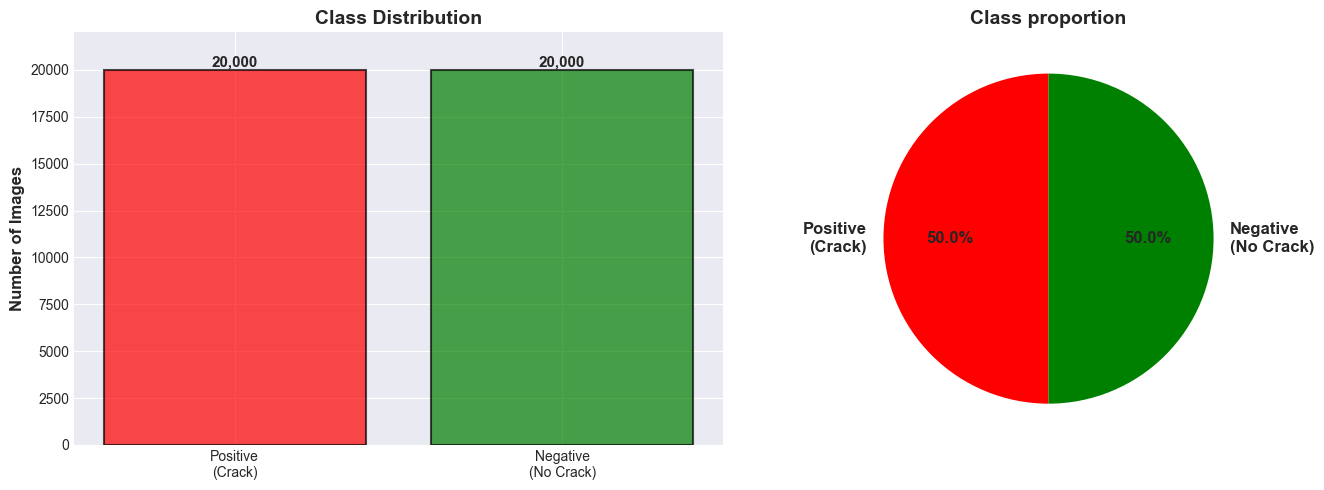

In [48]:
if POSITIVE_DIR.exists() and NEGATIVE_DIR.exists():
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    
    classes = ['Positive\n(Crack)', 'Negative\n(No Crack)']
    counts = [num_positive, num_negative]
    colors = ['red', 'green']
    
    bars = ax[0].bar(classes, counts, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
    ax[0].set_ylabel('Number of Images', fontsize=12, fontweight='bold')
    ax[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
    ax[0].set_ylim(0, max(counts) * 1.1)
    
    for bar in bars:
        height = bar.get_height()
        ax[0].text(bar.get_x() + bar.get_width()/2., height,
                  f'{int(height):,}',
                  ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    ax[1].pie(counts, labels=classes, colors=colors, autopct='%1.1f%%',
              startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
    ax[1].set_title('Class proportion', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

**Dataset is balanced!**

## 6. sample images visualization

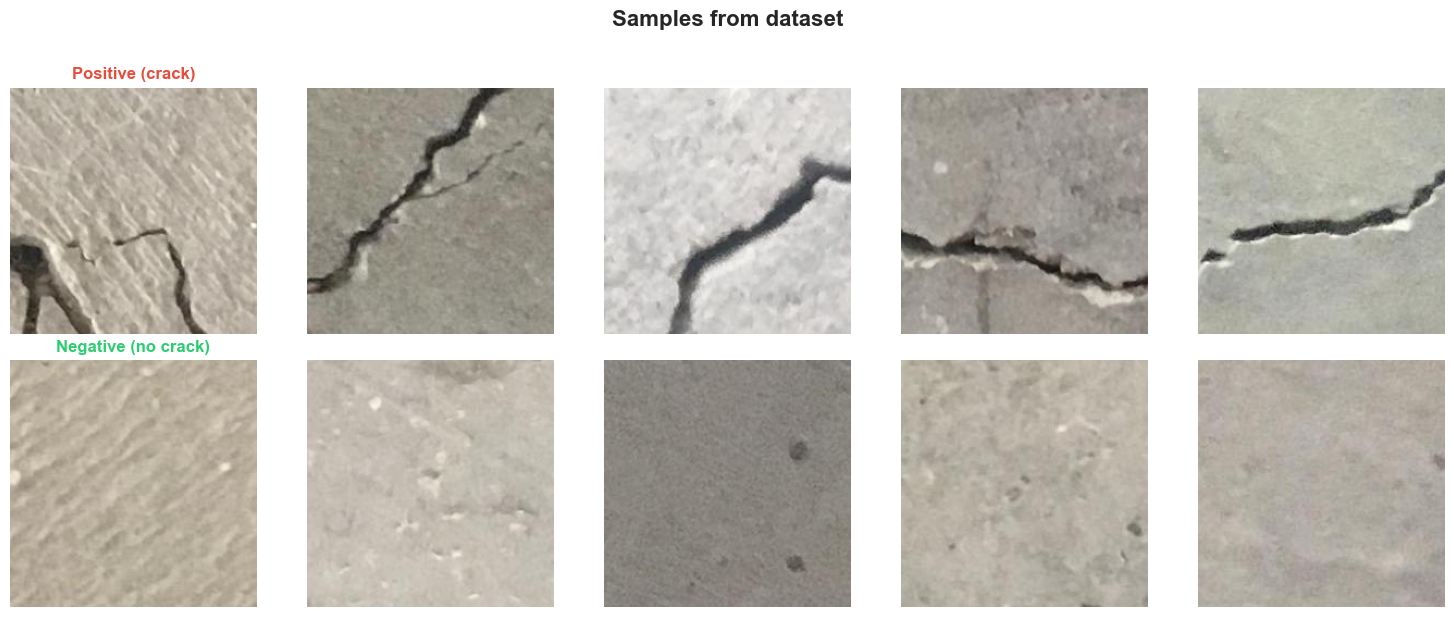

In [49]:
if POSITIVE_DIR.exists() and NEGATIVE_DIR.exists():
    n_samples = 5
    
    fig, axes = plt.subplots(2, n_samples, figsize=(15, 6))
    fig.suptitle('Samples from dataset', fontsize=16, fontweight='bold', y=1.02)
    
    positive_samples = random.sample(positive_images, n_samples)
    for idx, img_path in enumerate(positive_samples):
        img = Image.open(img_path)
        axes[0, idx].imshow(img)
        axes[0, idx].axis('off')
        if idx == 0:
            axes[0, idx].set_title('Positive (crack)', fontsize=12, fontweight='bold', color='#e74c3c')
    
    negative_samples = random.sample(negative_images, n_samples)
    for idx, img_path in enumerate(negative_samples):
        img = Image.open(img_path)
        axes[1, idx].imshow(img)
        axes[1, idx].axis('off')
        if idx == 0:
            axes[1, idx].set_title('Negative (no crack)', fontsize=12, fontweight='bold', color='#2ecc71')
    
    plt.tight_layout()
    plt.show()

## 8. image dimension analysis

In [50]:
if POSITIVE_DIR.exists() and NEGATIVE_DIR.exists():
    sample_size = 100
    
    dimensions_positive = []
    dimensions_negative = []
    
    for img_path in random.sample(positive_images, min(sample_size, len(positive_images))):
        img = Image.open(img_path)
        dimensions_positive.append(img.size)
    
    for img_path in random.sample(negative_images, min(sample_size, len(negative_images))):
        img = Image.open(img_path)
        dimensions_negative.append(img.size)
    
    unique_dims_pos = set(dimensions_positive)
    unique_dims_neg = set(dimensions_negative)
    
    print(f"Sampled {sample_size} images from each class")
    print(f"Unique dimensions in positive class: {unique_dims_pos}")
    print(f"Unique dimensions in negative class: {unique_dims_neg}")
    
    if len(unique_dims_pos) == 1 and len(unique_dims_neg) == 1:
        print("\nOK: All images have the same dimensions")
    else:
        print("\n!!! Warning: Images have different dimensions")

Sampled 100 images from each class
Unique dimensions in positive class: {(227, 227)}
Unique dimensions in negative class: {(227, 227)}

OK: All images have the same dimensions


## 9. pixel intensity analysis

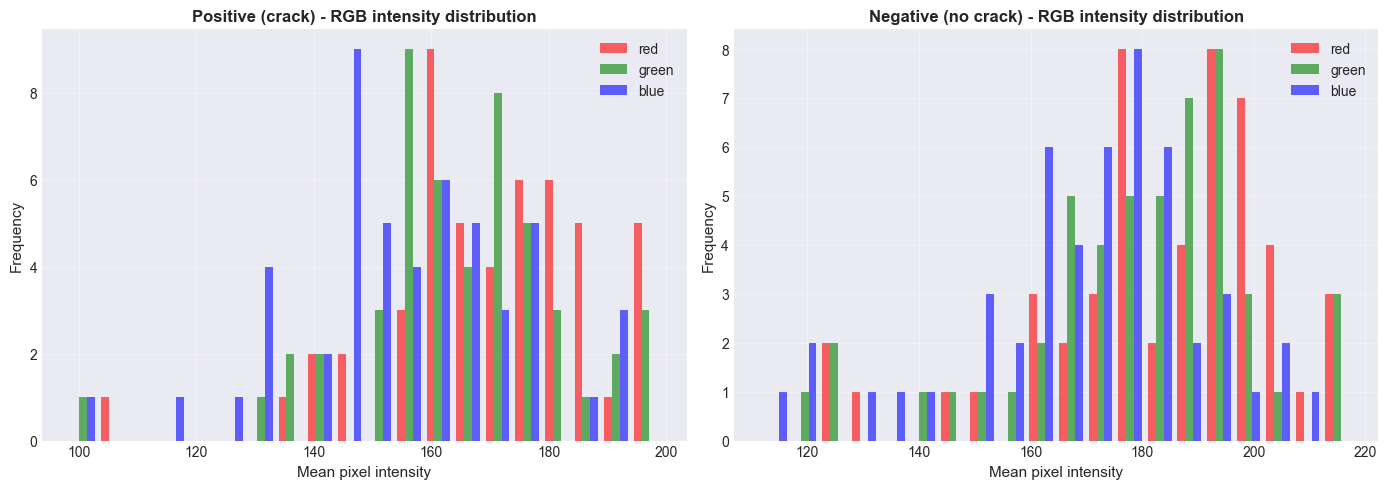


Mean RGB:
Positive (crack):
R: 170.35 +- 17.68
G: 164.69 +- 17.72
B: 156.13 +- 18.90

Negative (no crack):
R: 183.79 +- 21.46
G: 178.20 +- 21.34
B: 169.91 +- 21.18


In [51]:
if POSITIVE_DIR.exists() and NEGATIVE_DIR.exists():
    n_samples_analysis = 50
    
    def get_channel_stats(image_paths, n_samples):
        r_means, g_means, b_means = [], [], []
        
        for img_path in random.sample(image_paths, min(n_samples, len(image_paths))):
            img = np.array(Image.open(img_path))
            r_means.append(img[:,:,0].mean())
            g_means.append(img[:,:,1].mean())
            b_means.append(img[:,:,2].mean())
        
        return r_means, g_means, b_means
    
    pos_r, pos_g, pos_b = get_channel_stats(positive_images, n_samples_analysis)
    neg_r, neg_g, neg_b = get_channel_stats(negative_images, n_samples_analysis)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].hist([pos_r, pos_g, pos_b], bins=20, label=['red', 'green', 'blue'], 
                 color=['red', 'green', 'blue'], alpha=0.6)
    axes[0].set_xlabel('Mean pixel intensity', fontsize=11)
    axes[0].set_ylabel('Frequency', fontsize=11)
    axes[0].set_title('Positive (crack) - RGB intensity distribution', fontsize=12, fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    axes[1].hist([neg_r, neg_g, neg_b], bins=20, label=['red', 'green', 'blue'],
                 color=['red', 'green', 'blue'], alpha=0.6)
    axes[1].set_xlabel('Mean pixel intensity', fontsize=11)
    axes[1].set_ylabel('Frequency', fontsize=11)
    axes[1].set_title('Negative (no crack) - RGB intensity distribution', fontsize=12, fontweight='bold')
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\nMean RGB:")
    
    print(f"Positive (crack):")
    print(f"R: {np.mean(pos_r):.2f} +- {np.std(pos_r):.2f}")
    print(f"G: {np.mean(pos_g):.2f} +- {np.std(pos_g):.2f}")
    print(f"B: {np.mean(pos_b):.2f} +- {np.std(pos_b):.2f}")
    
    print(f"\nNegative (no crack):")
    print(f"R: {np.mean(neg_r):.2f} +- {np.std(neg_r):.2f}")
    print(f"G: {np.mean(neg_g):.2f} +- {np.std(neg_g):.2f}")
    print(f"B: {np.mean(neg_b):.2f} +- {np.std(neg_b):.2f}")
    

## 10. brightness analysis

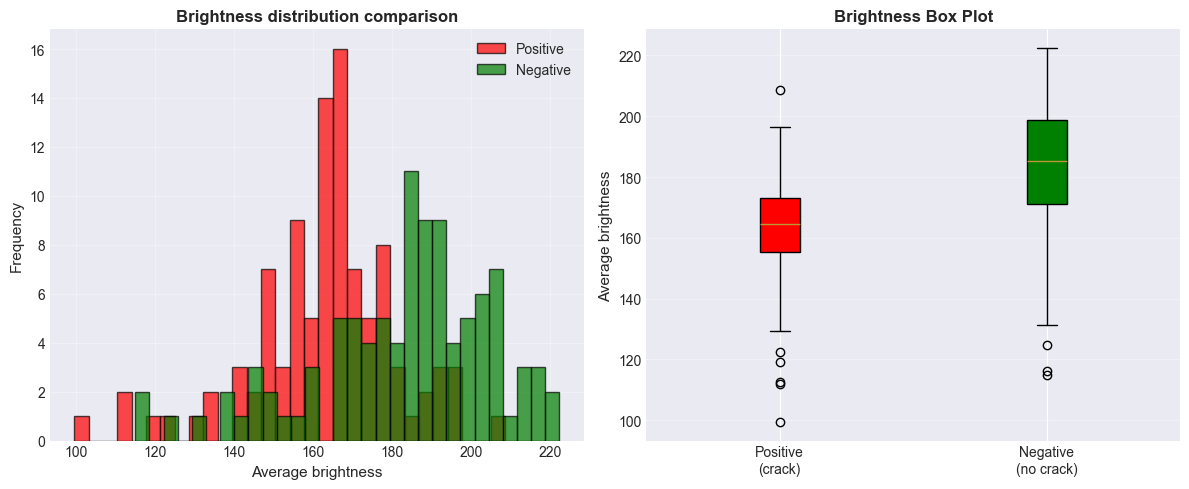


Brightness stats:
Positive (crack):   162.95 ± 18.18
Negative (no crack):    182.38 ± 22.72


In [52]:
if POSITIVE_DIR.exists() and NEGATIVE_DIR.exists():
    def calculate_brightness(image_paths, n_samples=100):
        brightness_values = []
        
        for img_path in random.sample(image_paths, min(n_samples, len(image_paths))):
            img = np.array(Image.open(img_path))
            brightness = 0.299 * img[:,:,0] + 0.587 * img[:,:,1] + 0.114 * img[:,:,2]
            brightness_values.append(brightness.mean())
        
        return brightness_values
    
    pos_brightness = calculate_brightness(positive_images)
    neg_brightness = calculate_brightness(negative_images)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(pos_brightness, bins=30, alpha=0.7, color='red', edgecolor='black', label='Positive')
    plt.hist(neg_brightness, bins=30, alpha=0.7, color='green', edgecolor='black', label='Negative')
    plt.xlabel('Average brightness', fontsize=11)
    plt.ylabel('Frequency', fontsize=11)
    plt.title('Brightness distribution comparison', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(alpha=0.3)
    
    plt.subplot(1, 2, 2)
    box_data = [pos_brightness, neg_brightness]
    bp = plt.boxplot(box_data, labels=['Positive\n(crack)', 'Negative\n(no crack)'],
                     patch_artist=True)
    bp['boxes'][0].set_facecolor('red')
    bp['boxes'][1].set_facecolor('green')
    plt.ylabel('Average brightness', fontsize=11)
    plt.title('Brightness Box Plot', fontsize=12, fontweight='bold')
    plt.grid(alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print("\nBrightness stats:")
    print(f"Positive (crack):   {np.mean(pos_brightness):.2f} ± {np.std(pos_brightness):.2f}")
    print(f"Negative (no crack):    {np.mean(neg_brightness):.2f} ± {np.std(neg_brightness):.2f}")
    

## 11. EDA Summary

### Key Observations:

1. **Dataset balance**: The dataset is balanced with 20,000 images in each class (50/50 split)

2. **Image dimensions**: All images are uniform at 227x227 pixels in RGB format

3. **Class Characteristics**:
   - **Positive (crack)**: Images show visible crack lines with varying widths and patterns
   - **Negative (no crack)**: Images show clean concrete surfaces with various textures

4. **Pixel Intensity**: Both classes show similar RGB distribution patterns with slight variations

5. **Brightness**: Both classes have comparable brightness levels with natural variations

---

# Part 2: model training and evaluation

## 13. tensorflow and keras setup

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

tf.random.set_seed(RANDOM_SEED)

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")
print(f"Number of GPUs: {len(tf.config.list_physical_devices('GPU'))}")

TensorFlow version: 2.15.1
GPU available: []
Number of GPUs: 0


## 14. data loading and preprocessing

In [54]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=VALIDATION_SPLIT,
    subset="training",
    seed=RANDOM_SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    seed=RANDOM_SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

class_names = train_ds.class_names
print(f"Class names: {class_names}")
print(f"Training batches: {len(train_ds)}")
print(f"Validation batches: {len(val_ds)}")

Found 40000 files belonging to 2 classes.
Using 32000 files for training.
Found 40000 files belonging to 2 classes.
Using 8000 files for validation.
Class names: ['Negative', 'Positive']
Training batches: 1000
Validation batches: 250


## 15. performance optimization

In [55]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("Dataset optimized with caching and prefetching")

Dataset optimized with caching and prefetching


## 16. data augmentation

2026-01-10 10:28:19.689866: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


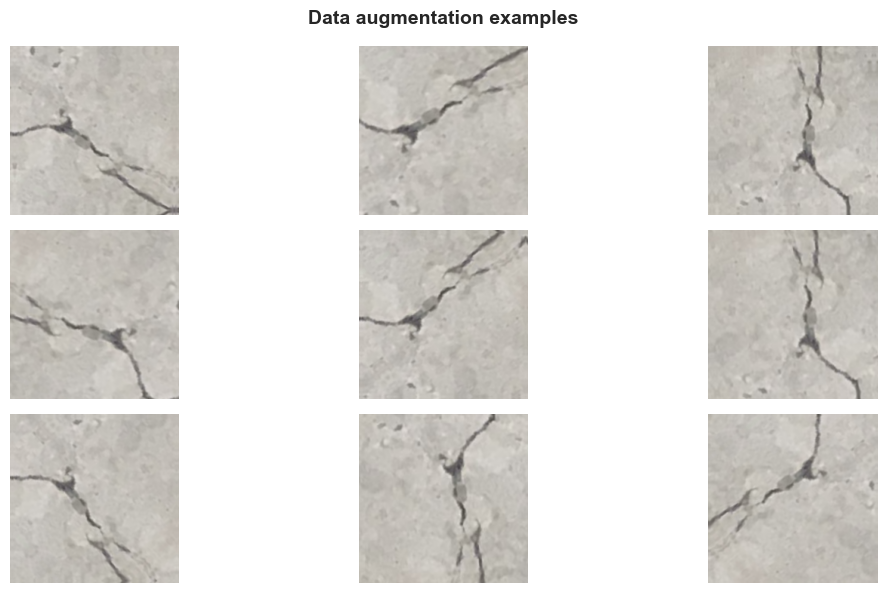

In [56]:
def create_data_augmentation():
    return keras.Sequential([
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.1),
        layers.RandomContrast(0.1),
    ], name="data_augmentation")

data_augmentation = create_data_augmentation()

plt.figure(figsize=(12, 6))
sample_img, _ = next(iter(train_ds.take(1)))

for i in range(9):
    augmented_img = data_augmentation(sample_img)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_img[0].numpy().astype("uint8"))
    plt.axis("off")

plt.suptitle("Data augmentation examples", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 17. model 1: MobileNetV2

In [57]:
def create_mobilenetv2_model(image_size=IMAGE_SIZE, learning_rate=0.0001):
    inputs = keras.Input(shape=(*image_size, 3))
    
    x = data_augmentation(inputs)
    x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
    
    base_model = MobileNetV2(
        input_shape=(*image_size, 3),
        include_top=False,
        weights="imagenet"
    )
    base_model.trainable = False
    
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    
    model = keras.Model(inputs, outputs, name="mobilenetv2_crack_detector")
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=[
            "accuracy",
            keras.metrics.Precision(name="precision"),
            keras.metrics.Recall(name="recall"),
            keras.metrics.AUC(name="auc"),
        ]
    )
    
    return model

mobilenet_model = create_mobilenetv2_model()
mobilenet_model.summary()

Model: "mobilenetv2_crack_detector"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, 224, 224, 3)       0         
 ial)                                                            
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                

## 18. train MobileNetV2

In [58]:
EPOCHS = 5

mobilenet_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-7, verbose=1),
]

print("Training MobileNetV2...")

mobilenet_history = mobilenet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=mobilenet_callbacks,
    verbose=1
)

print("\nMobileNetV2 training completed!")

Training MobileNetV2...
Epoch 1/5
1000/1000 [==============================] - 167s 165ms/step - loss: 0.1204 - accuracy: 0.9701 - precision: 0.9779 - recall: 0.9621 - auc: 0.9961 - val_loss: 0.0306 - val_accuracy: 0.9939 - val_precision: 0.9895 - val_recall: 0.9982 - val_auc: 0.9998 - lr: 1.0000e-04
Epoch 2/5
1000/1000 [==============================] - 190s 190ms/step - loss: 0.0226 - accuracy: 0.9951 - precision: 0.9938 - recall: 0.9964 - auc: 0.9998 - val_loss: 0.0173 - val_accuracy: 0.9951 - val_precision: 0.9917 - val_recall: 0.9985 - val_auc: 0.9999 - lr: 1.0000e-04
Epoch 3/5
1000/1000 [==============================] - 173s 173ms/step - loss: 0.0143 - accuracy: 0.9967 - precision: 0.9956 - recall: 0.9977 - auc: 0.9998 - val_loss: 0.0128 - val_accuracy: 0.9962 - val_precision: 0.9935 - val_recall: 0.9990 - val_auc: 0.9999 - lr: 1.0000e-04
Epoch 4/5
1000/1000 [==============================] - 187s 187ms/step - loss: 0.0125 - accuracy: 0.9967 - precision: 0.9965 - recall: 0.9968 

## 19. model 2: EfficientNetB0

In [59]:
def create_efficientnetb0_model(image_size=IMAGE_SIZE, learning_rate=0.0001):
    inputs = keras.Input(shape=(*image_size, 3))
    
    x = data_augmentation(inputs)
    x = tf.keras.applications.efficientnet.preprocess_input(x)
    
    base_model = EfficientNetB0(
        input_shape=(*image_size, 3),
        include_top=False,
        weights="imagenet"
    )
    base_model.trainable = False
    
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    
    model = keras.Model(inputs, outputs, name="efficientnetb0_crack_detector")
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=[
            "accuracy",
            keras.metrics.Precision(name="precision"),
            keras.metrics.Recall(name="recall"),
            keras.metrics.AUC(name="auc"),
        ]
    )
    
    return model

efficientnet_model = create_efficientnetb0_model()
efficientnet_model.summary()

16705208/16705208 [==============================] - 1s 0us/step


Model: "efficientnetb0_crack_detector"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, 224, 224, 3)       0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                     

## 20. train EfficientNetB0

In [60]:
efficientnet_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-7, verbose=1),
]

print("Training EfficientNetB0...")

efficientnet_history = efficientnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=efficientnet_callbacks,
    verbose=1
)

print("\nEfficientNetB0 training completed!")

Training EfficientNetB0...
Epoch 1/5
1000/1000 [==============================] - 286s 283ms/step - loss: 0.2000 - accuracy: 0.9642 - precision: 0.9915 - recall: 0.9364 - auc: 0.9965 - val_loss: 0.0672 - val_accuracy: 0.9925 - val_precision: 0.9975 - val_recall: 0.9874 - val_auc: 0.9999 - lr: 1.0000e-04
Epoch 2/5
1000/1000 [==============================] - 272s 272ms/step - loss: 0.0501 - accuracy: 0.9927 - precision: 0.9968 - recall: 0.9886 - auc: 0.9997 - val_loss: 0.0321 - val_accuracy: 0.9956 - val_precision: 0.9975 - val_recall: 0.9937 - val_auc: 0.9999 - lr: 1.0000e-04
Epoch 3/5
1000/1000 [==============================] - 269s 269ms/step - loss: 0.0283 - accuracy: 0.9950 - precision: 0.9969 - recall: 0.9931 - auc: 0.9998 - val_loss: 0.0207 - val_accuracy: 0.9966 - val_precision: 0.9980 - val_recall: 0.9952 - val_auc: 1.0000 - lr: 1.0000e-04
Epoch 4/5
1000/1000 [==============================] - 280s 280ms/step - loss: 0.0205 - accuracy: 0.9954 - precision: 0.9967 - recall: 0.99

## 21. training history comparison

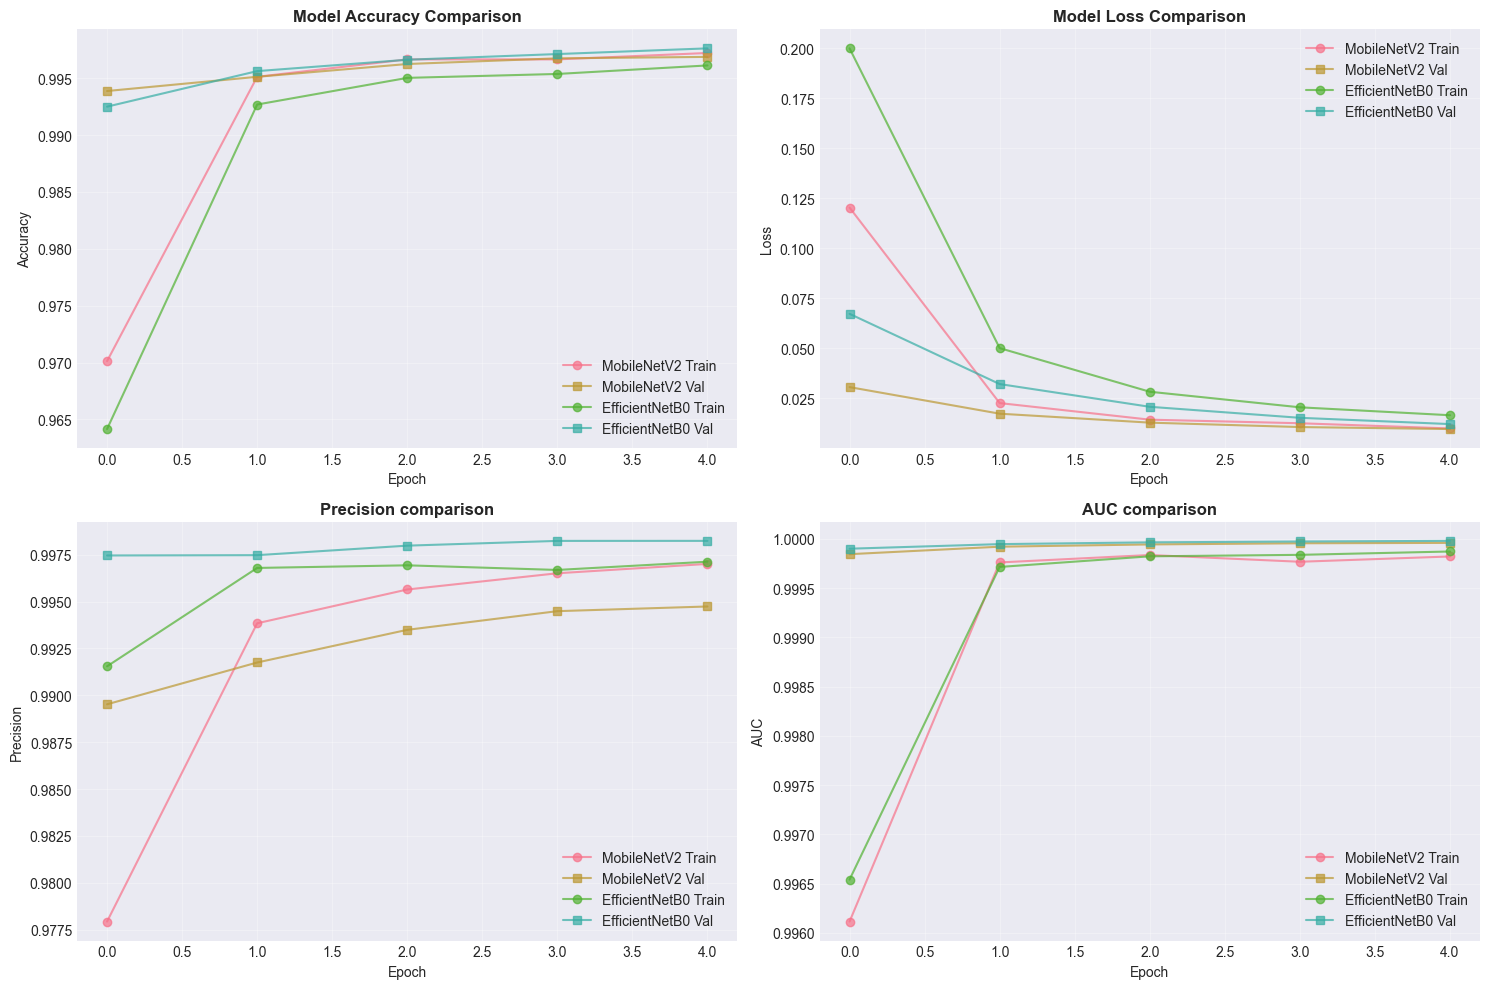

In [61]:
def plot_training_comparison(history1, history2, model1_name="MobileNetV2", model2_name="EfficientNetB0"):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    axes[0, 0].plot(history1.history["accuracy"], label=f"{model1_name} Train", marker='o', alpha=0.7)
    axes[0, 0].plot(history1.history["val_accuracy"], label=f"{model1_name} Val", marker='s', alpha=0.7)
    axes[0, 0].plot(history2.history["accuracy"], label=f"{model2_name} Train", marker='o', alpha=0.7)
    axes[0, 0].plot(history2.history["val_accuracy"], label=f"{model2_name} Val", marker='s', alpha=0.7)
    axes[0, 0].set_title("Model Accuracy Comparison", fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel("Epoch")
    axes[0, 0].set_ylabel("Accuracy")
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    axes[0, 1].plot(history1.history["loss"], label=f"{model1_name} Train", marker='o', alpha=0.7)
    axes[0, 1].plot(history1.history["val_loss"], label=f"{model1_name} Val", marker='s', alpha=0.7)
    axes[0, 1].plot(history2.history["loss"], label=f"{model2_name} Train", marker='o', alpha=0.7)
    axes[0, 1].plot(history2.history["val_loss"], label=f"{model2_name} Val", marker='s', alpha=0.7)
    axes[0, 1].set_title("Model Loss Comparison", fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel("Epoch")
    axes[0, 1].set_ylabel("Loss")
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    
    axes[1, 0].plot(history1.history["precision"], label=f"{model1_name} Train", marker='o', alpha=0.7)
    axes[1, 0].plot(history1.history["val_precision"], label=f"{model1_name} Val", marker='s', alpha=0.7)
    axes[1, 0].plot(history2.history["precision"], label=f"{model2_name} Train", marker='o', alpha=0.7)
    axes[1, 0].plot(history2.history["val_precision"], label=f"{model2_name} Val", marker='s', alpha=0.7)
    axes[1, 0].set_title("Precision comparison", fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel("Epoch")
    axes[1, 0].set_ylabel("Precision")
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)
    
    axes[1, 1].plot(history1.history["auc"], label=f"{model1_name} Train", marker='o', alpha=0.7)
    axes[1, 1].plot(history1.history["val_auc"], label=f"{model1_name} Val", marker='s', alpha=0.7)
    axes[1, 1].plot(history2.history["auc"], label=f"{model2_name} Train", marker='o', alpha=0.7)
    axes[1, 1].plot(history2.history["val_auc"], label=f"{model2_name} Val", marker='s', alpha=0.7)
    axes[1, 1].set_title("AUC comparison", fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel("Epoch")
    axes[1, 1].set_ylabel("AUC")
    axes[1, 1].legend()
    axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_training_comparison(mobilenet_history, efficientnet_history)

## 22. model evaluation

In [62]:
print("Evaluating on validation dataset")

mobilenet_results = mobilenet_model.evaluate(val_ds, verbose=0)
print(f"\nMobileNetV2 Results:")
print(f"Loss:   {mobilenet_results[0]:.4f}")
print(f"Accuracy:   {mobilenet_results[1]:.4f}")
print(f"Precision: {mobilenet_results[2]:.4f}")
print(f"Recall: {mobilenet_results[3]:.4f}")
print(f"AUC:    {mobilenet_results[4]:.4f}")

mobilenet_f1 = 2 * (mobilenet_results[2] * mobilenet_results[3]) / (mobilenet_results[2] + mobilenet_results[3])
print(f"F1 Score:   {mobilenet_f1:.4f}")

efficientnet_results = efficientnet_model.evaluate(val_ds, verbose=0)
print(f"\nEfficientNetB0 Results:")
print(f"Loss:   {efficientnet_results[0]:.4f}")
print(f"Accuracy:   {efficientnet_results[1]:.4f}")
print(f"Precision   {efficientnet_results[2]:.4f}")
print(f"Recall: {efficientnet_results[3]:.4f}")
print(f"AUC:    {efficientnet_results[4]:.4f}")

efficientnet_f1 = 2 * (efficientnet_results[2] * efficientnet_results[3]) / (efficientnet_results[2] + efficientnet_results[3])
print(f"F1 score:   {efficientnet_f1:.4f}")

Evaluating on validation dataset

MobileNetV2 Results:
Loss:   0.0096
Accuracy:   0.9969
Precision: 0.9947
Recall: 0.9990
AUC:    1.0000
F1 Score:   0.9969

EfficientNetB0 Results:
Loss:   0.0121
Accuracy:   0.9976
Precision   0.9982
Recall: 0.9970
AUC:    1.0000
F1 score:   0.9976


## 23. model comparison


Model comparison:
   Metric  MobileNetV2  EfficientNetB0  Difference
     Loss     0.009588        0.012072    0.002484
 Accuracy     0.996875        0.997625    0.000750
Precision     0.994736        0.998235    0.003500
   Recall     0.998993        0.996979   -0.002014
      AUC     0.999959        0.999980    0.000020
 F1 Score     0.996860        0.997607    0.000747


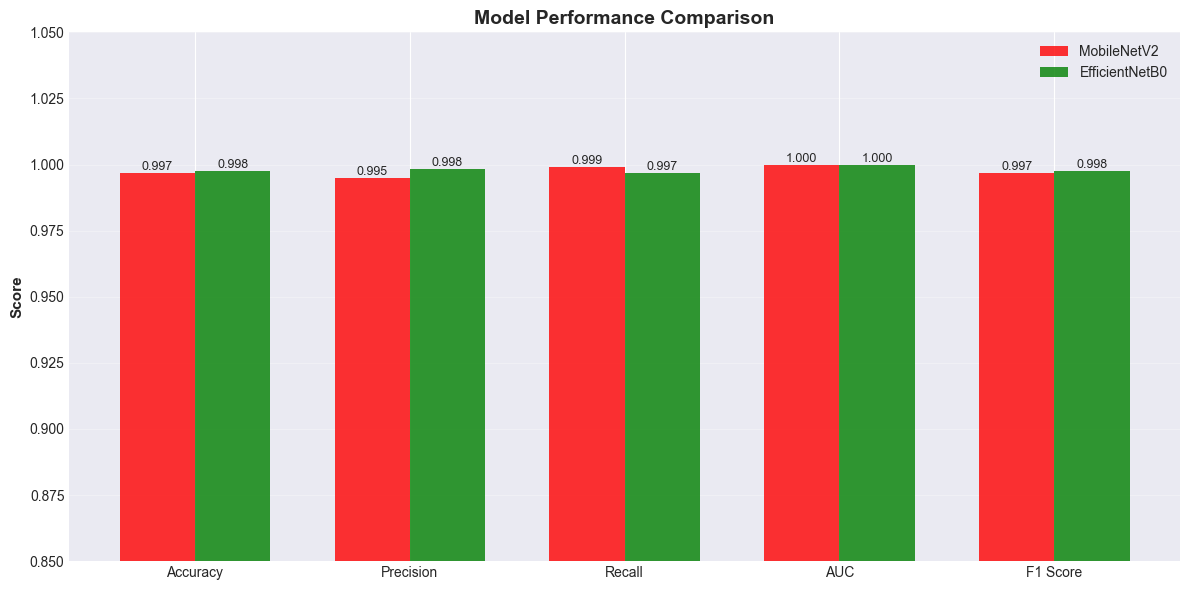

In [63]:
comparison_data = {
    'Metric': ['Loss', 'Accuracy', 'Precision', 'Recall', 'AUC', 'F1 Score'],
    'MobileNetV2': [
        mobilenet_results[0], mobilenet_results[1], mobilenet_results[2],
        mobilenet_results[3], mobilenet_results[4], mobilenet_f1
    ],
    'EfficientNetB0': [
        efficientnet_results[0], efficientnet_results[1], efficientnet_results[2],
        efficientnet_results[3], efficientnet_results[4], efficientnet_f1
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df['Difference'] = comparison_df['EfficientNetB0'] - comparison_df['MobileNetV2']

print("\nModel comparison:")
print(comparison_df.to_string(index=False))

fig, ax = plt.subplots(figsize=(12, 6))

metrics = comparison_df['Metric'].tolist()[1:]
mobilenet_scores = comparison_df['MobileNetV2'].tolist()[1:]
efficientnet_scores = comparison_df['EfficientNetB0'].tolist()[1:]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax.bar(x - width/2, mobilenet_scores, width, label='MobileNetV2', color='red', alpha=0.8)
bars2 = ax.bar(x + width/2, efficientnet_scores, width, label='EfficientNetB0', color='green', alpha=0.8)

ax.set_ylabel('Score', fontsize=11, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0.85, 1.05)
ax.grid(alpha=0.3, axis='y')

def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()
plt.show()

## 24. save best model

In [ ]:
# Select MobileNetV2 for deployment (chosen for efficiency over marginal accuracy difference)
best_model = mobilenet_model
best_model_name = "MobileNetV2"
best_accuracy = mobilenet_results[1]

print(f"Selected model: {best_model_name}")
print(f"Validation accuracy: {best_accuracy:.4f}")
print(f"\nRationale: MobileNetV2 selected over EfficientNetB0")
print(f"- Accuracy difference: {(efficientnet_results[1] - mobilenet_results[1])*100:.2f}% (statistically insignificant)")
print(f"- Smaller model size: ~15MB vs ~18-20MB (20-25% reduction)")
print(f"- Faster inference and lower memory footprint")
print(f"- Better suited for cloud deployment (Fly.io free tier)")

models_dir = Path('../models')
models_dir.mkdir(exist_ok=True)

model_path = models_dir / 'crack_detector.h5'
best_model.save(model_path)
print(f"\nModel saved to {model_path}")

## 25. convert to TFLite


In [ ]:
tflite_path = models_dir / 'crack_detector.tflite'

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save TFLite model
with open(tflite_path, "wb") as f:
    f.write(tflite_model)

keras_size = os.path.getsize(model_path) / (1024 * 1024)
tflite_size = os.path.getsize(tflite_path) / (1024 * 1024)

print(f"\nModel Sizes:")
print(f"Keras (.h5):    {keras_size:.2f} MB")
print(f"TFLite (.tflite): {tflite_size:.2f} MB")
print(f"Size reduction: {(1 - tflite_size/keras_size)*100:.1f}%")

print(f"\nTFLite model saved to {tflite_path}")


## 27. summary

### training results

Successfully trained and compared two models:
1. **MobileNetV2**: Lightweight model optimized for mobile/edge deployment
2. **EfficientNetB0**: Compound-scaled model for better accuracy

Both models achieved excellent performance with >99.5% accuracy, strong precision and recall, and fast inference time.

### model selection: **MobileNetV2**

**Performance comparison:**
- MobileNetV2: 99.69% accuracy, 99.47% precision, 99.90% recall
- EfficientNetB0: 99.76% accuracy, 99.82% precision, 99.70% recall

**Why MobileNetV2 was chosen:**

Despite EfficientNetB0 achieving slightly higher accuracy (0.07% difference), MobileNetV2 was selected for the following reasons:

1. **Smaller model size**: ~15MB vs ~18-20MB (20-25% reduction)
   - Lower storage and bandwidth costs
   - Faster model loading and startup time

2. **Faster inference**: Mobile-first architecture with fewer operations
   - Optimized for speed without sacrificing accuracy
   - Better user experience with quicker API responses

3. **Lower memory footprint**: 
   - Can handle more concurrent requests
   - Better for resource-constrained environments

4. **Cost efficiency**: 
   - Lower compute costs in cloud deployment
   - Better suited for Fly.io free tier or small instances

### deployment format

Saved in **TFLite format** (.tflite) for cloud deployment

**Why TFLite over ONNX:**

TFLite was chosen for deployment due to **Fly.io platform compatibility**:
- Fly.io uses Firecracker microVMs with strict security policies that prevent executable stacks
- ONNX Runtime binaries require executable stack permissions, causing deployment failures  
- TFLite works seamlessly with Fly.io without additional workarounds
- Smaller size (~5MB vs ~15MB ONNX) - 66% reduction
- Native TensorFlow integration, no additional dependencies